# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [123]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [124]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [125]:
X_train, y_train = [], []
timesteps = 60 

for i in range(timesteps, 1258):
    X_train.append(training_set_scaled[ i-timesteps:i, 0 ])
    y_train.append(training_set_scaled[ i, 0 ])
    
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [126]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [128]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [129]:
regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [130]:
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [131]:
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [132]:
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

In [133]:
regressor.add(LSTM(units = 75, return_sequences = False))
regressor.add(Dropout(0.2))

### Adding the output layer

In [134]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [135]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [136]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0449
Epoch 2/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0036
Epoch 11/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0039
Epoch 13/100


38/38 [==============================] - 5s 142ms/step - loss: 0.0013
Epoch 100/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0013


### Saving the checkpoint

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [137]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [138]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps :].values  # Get everything from 60 days before test set
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [139]:
X_test, y_test = [], []
for i in range(timesteps, timesteps + 20):
    X_test.append(inputs[i-timesteps:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [140]:
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

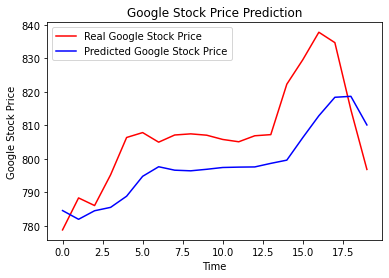

In [141]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Evaluate results (Absolute Value)

In [142]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

13.150947795127943

### Evaluate results (Trends)

In [143]:
start = dataset_train.iloc[[-1]]['Open'].values[0]

real_stock_trend, predicted_stock_trend = [], []

for i in range(len(real_stock_price)): 
    if (i == 0):
        real_stock_trend.append(real_stock_price[i][0] - start)
        predicted_stock_trend.append(predicted_stock_price[i][0] - start)
    else:
        real_stock_trend.append(real_stock_price[i][0] - real_stock_price[i-1][0])
        predicted_stock_trend.append(predicted_stock_price[i][0] - predicted_stock_price[i-1][0])

In [144]:
rmse = math.sqrt(mean_squared_error(real_stock_trend, predicted_stock_trend))
rmse

7.675690057499948